#Importing libraries

In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import pandas as pd
import PIL
import os
import pickle
from google.colab import files
import torchvision
import numpy as np
import matplotlib.pyplot as plt

#Seeding

In [ ]:
np.random.seed(26)

#Function for loading dataset

In [ ]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, csv_path, images_folder, transform=torchvision.transforms.Compose([
    torchvision.transforms.Grayscale(num_output_channels=1),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Resize(28),
    torchvision.transforms.Normalize(
        mean=[0.5],
        std=[0.5],
    ),
])):
        self.df = pd.read_csv(csv_path)
        self.images_folder = images_folder
        self.transform = transform
        
    def __len__(self):
        return len(self.df)

    def __getitem__(self, index):
        record = self.df.iloc[index]
        path = self.images_folder + "/" +record[0]
        image = PIL.Image.open(path)
        label = record[3]
        if self.transform is not None:
            image = self.transform(image) 
        return image, label

#Function for converting tensor to image

In [ ]:
def tensorToImage(x):
  trans = transforms.ToPILImage()
  image = trans(x)
  return image

#Loading data

In [ ]:
path1 = '/content/drive/MyDrive/4.2/soft_com/Dataset/Assignment2/training-a.csv'
path2 = '/content/drive/MyDrive/4.2/soft_com/Dataset/Assignment2/training-a'
obj = CustomDataset(path1, path2)
dataset = [[x[0],x[1]] for x in obj]

#Visualizing data

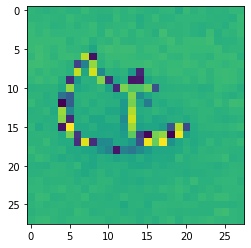

In [ ]:
plt.imshow(tensorToImage(obj[0][0]))

#Checking the length of dataset

In [ ]:
len(dataset)

19702

#Experiment 2

#Aproach 1
batch size = 64 <br>
num_iters = 30000<br>
input_dim = 1 * 28 * 28 <br>
num_hidden = 100 <br>
output_dim = 10 <br>
 learning_rate = 0.001 <br>
Activation = ReLU <br>
Criterion = Cross Entropy <br>
Optimizar = SGD <br>
<font color = 'red'> Accuracy = 9.79% </font><br>
Comment: The accuracy is not increasing at all. It has been stucked in 9%, so I interrupt the training. <br>

In [ ]:
# Hyperparameters

batch_size = 64
num_iters = 30000
input_dim = 1*28*28 # num_features = 784
num_hidden = 100
output_dim = 10
learning_rate = 0.001

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_dataset, shuffle= False, batch_size=batch_size)

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        
        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()


        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_4 = nn.ReLU()
        
        
        ### 2nd hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_5 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_6 = nn.ReLU()
        
        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        
        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)

        
        ### 2nd hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_4(out)
        
        
        ### 3rd hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_5(out)

        ### 3rd hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_6(out)
        

        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas


# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


iter_ = []
loss_ = []
accuracy_ = []

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 1*28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 100 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 1*28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            iter_.append(iter)
            loss_.append(loss.item())
            accuracy_.append(accuracy)
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 100. Loss: 2.3002102375030518. Accuracy: 9.819842679522964
Iteration: 200. Loss: 2.319030284881592. Accuracy: 9.819842679522964
Iteration: 300. Loss: 2.3197758197784424. Accuracy: 9.819842679522964
Iteration: 400. Loss: 2.294833183288574. Accuracy: 9.819842679522964
Iteration: 500. Loss: 2.3092904090881348. Accuracy: 9.819842679522964
Iteration: 600. Loss: 2.29862117767334. Accuracy: 9.819842679522964
Iteration: 700. Loss: 2.3071072101593018. Accuracy: 9.819842679522964
Iteration: 800. Loss: 2.319882392883301. Accuracy: 9.819842679522964
Iteration: 900. Loss: 2.3081657886505127. Accuracy: 9.819842679522964
Iteration: 1000. Loss: 2.3030426502227783. Accuracy: 9.819842679522964
Iteration: 1100. Loss: 2.309328079223633. Accuracy: 9.819842679522964
Iteration: 1200. Loss: 2.302061080932617. Accuracy: 9.819842679522964
Iteration: 1300. Loss: 2.313614845275879. Accuracy: 9.819842679522964
Iteration: 1400. Loss: 2.3047633171081543. Accuracy: 9.819842679522964
Iteration: 1500. Loss: 

KeyboardInterrupt: ignored

#Aproach 2
batch size = 64<br>
num_iters = 30000<br>
input_dim = 1 * 28 * 28 <br>
num_hidden = 100 <br>
output_dim = 10 <br>
<font color = 'tiffani blue'> learning_rate = 0.01 </font><br>
Activation = ReLU <br>
Criterion = Cross Entropy <br>
Optimizar = SGD <br>
<font color = 'orange'> Accuracy = 24.89% </font><br>
Comment: I have increased the learning rate. The accuracy is better than the previous one but this accuracy is not acceptable. <br>


In [ ]:
# Hyperparameters

batch_size = 64
num_iters = 30000
input_dim = 1*28*28 # num_features = 784
num_hidden = 100
output_dim = 10
learning_rate = 0.01

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_dataset, shuffle= False, batch_size=batch_size)

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        
        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()


        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_4 = nn.ReLU()
        
        
        ### 2nd hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_5 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_6 = nn.ReLU()
        
        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        
        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)

        
        ### 2nd hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_4(out)
        
        
        ### 3rd hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_5(out)

        ### 3rd hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_6(out)
        

        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas


# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


iter_ = []
loss_ = []
accuracy_ = []

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 1*28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 100 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 1*28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            iter_.append(iter)
            loss_.append(loss.item())
            accuracy_.append(accuracy)
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 100. Loss: 2.3033573627471924. Accuracy: 10.175082466379092
Iteration: 200. Loss: 2.2982337474823. Accuracy: 10.175082466379092
Iteration: 300. Loss: 2.3028087615966797. Accuracy: 10.175082466379092
Iteration: 400. Loss: 2.308992385864258. Accuracy: 10.175082466379092
Iteration: 500. Loss: 2.3003430366516113. Accuracy: 12.890129408779497
Iteration: 600. Loss: 2.3085360527038574. Accuracy: 8.67800050748541
Iteration: 700. Loss: 2.305554151535034. Accuracy: 8.67800050748541
Iteration: 800. Loss: 2.307187080383301. Accuracy: 8.67800050748541
Iteration: 900. Loss: 2.3025152683258057. Accuracy: 8.67800050748541
Iteration: 1000. Loss: 2.301551103591919. Accuracy: 8.67800050748541
Iteration: 1100. Loss: 2.3030285835266113. Accuracy: 11.037807663029687
Iteration: 1200. Loss: 2.3052635192871094. Accuracy: 8.67800050748541
Iteration: 1300. Loss: 2.302161931991577. Accuracy: 8.67800050748541
Iteration: 1400. Loss: 2.300096273422241. Accuracy: 8.67800050748541
Iteration: 1500. Loss: 2.3

#Aproach 3
batch size = 64<br>
num_iters = 30000<br>
input_dim = 1 * 28 * 28 <br>
num_hidden = 100 <br>
output_dim = 10 <br>
<font color = 'tiffani blue'> learning_rate = 0.1 </font><br>
Activation = ReLU <br>
Criterion = Cross Entropy <br>
Optimizar = SGD <br>
<font color = 'green'> Accuracy = 75.61% </font><br>
Comment: After increasing the learning rate even more, the accuracy has increased a lot.<br>

In [ ]:
# Hyperparameters

batch_size = 64
num_iters = 30000
input_dim = 1*28*28 # num_features = 784
num_hidden = 100
output_dim = 10
learning_rate = 0.1

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_dataset, shuffle= False, batch_size=batch_size)

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        
        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()


        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_4 = nn.ReLU()
        
        
        ### 2nd hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_5 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_6 = nn.ReLU()
        
        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        
        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)

        
        ### 2nd hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_4(out)
        
        
        ### 3rd hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_5(out)

        ### 3rd hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_6(out)
        

        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas


# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


iter_ = []
loss_ = []
accuracy_ = []

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 1*28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 100 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 1*28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            iter_.append(iter)
            loss_.append(loss.item())
            accuracy_.append(accuracy)
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 100. Loss: 2.2985525131225586. Accuracy: 9.261608728749048
Iteration: 200. Loss: 2.3117992877960205. Accuracy: 9.261608728749048
Iteration: 300. Loss: 2.297316074371338. Accuracy: 9.79446840903324
Iteration: 400. Loss: 2.3112902641296387. Accuracy: 10.327328089317431
Iteration: 500. Loss: 2.3096959590911865. Accuracy: 9.261608728749048
Iteration: 600. Loss: 2.3038060665130615. Accuracy: 9.261608728749048
Iteration: 700. Loss: 2.298801898956299. Accuracy: 9.540725704136007
Iteration: 800. Loss: 2.296647548675537. Accuracy: 9.79446840903324
Iteration: 900. Loss: 2.3037259578704834. Accuracy: 9.261608728749048
Iteration: 1000. Loss: 2.2994396686553955. Accuracy: 9.388480081197665
Iteration: 1100. Loss: 2.297450304031372. Accuracy: 18.218726211621416
Iteration: 1200. Loss: 2.2870306968688965. Accuracy: 16.54402435929967
Iteration: 1300. Loss: 2.2846486568450928. Accuracy: 12.661760974371987
Iteration: 1400. Loss: 2.2578957080841064. Accuracy: 10.75869068764273
Iteration: 1500. L

#Aproach 4
batch size = 64<br>
<font color = 'tiffani blue'> num_iters = 60000 </font><br>
input_dim = 1 * 28 * 28 <br>
num_hidden = 100 <br>
output_dim = 10 <br>
learning_rate = 0.1 <br>
Activation = ReLU <br>
Criterion = Cross Entropy <br>
Optimizar = SGD <br>
<font color = 'green'> Accuracy = 86.62% </font><br>
Comment: I have doubled the iteration and the accuracy has increased about 11%.<br>

In [ ]:
# Hyperparameters

batch_size = 64
num_iters = 60000
input_dim = 1*28*28 # num_features = 784
num_hidden = 100
output_dim = 10
learning_rate = 0.1

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_dataset, shuffle= False, batch_size=batch_size)

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        
        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()


        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_4 = nn.ReLU()
        
        
        ### 2nd hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_5 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_6 = nn.ReLU()
        
        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        
        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)

        
        ### 2nd hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_4(out)
        
        
        ### 3rd hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_5(out)

        ### 3rd hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_6(out)
        

        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas


# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


iter_ = []
loss_ = []
accuracy_ = []

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 1*28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 100 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 1*28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            iter_.append(iter)
            loss_.append(loss.item())
            accuracy_.append(accuracy)
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 100. Loss: 2.3023600578308105. Accuracy: 9.769094138543517
Iteration: 200. Loss: 2.304642915725708. Accuracy: 9.997462572951028
Iteration: 300. Loss: 2.303281545639038. Accuracy: 10.175082466379092
Iteration: 400. Loss: 2.3033735752105713. Accuracy: 13.778228875919817
Iteration: 500. Loss: 2.3057358264923096. Accuracy: 9.286982999238772
Iteration: 600. Loss: 2.301929473876953. Accuracy: 9.769094138543517
Iteration: 700. Loss: 2.30350923538208. Accuracy: 9.997462572951028
Iteration: 800. Loss: 2.305283546447754. Accuracy: 15.935041867546309
Iteration: 900. Loss: 2.3078770637512207. Accuracy: 17.43212382643999
Iteration: 1000. Loss: 2.3017938137054443. Accuracy: 19.538188277087034
Iteration: 1100. Loss: 2.2981760501861572. Accuracy: 11.64679015478305
Iteration: 1200. Loss: 2.2953550815582275. Accuracy: 9.79446840903324
Iteration: 1300. Loss: 2.2913131713867188. Accuracy: 10.352702359807155
Iteration: 1400. Loss: 2.2804601192474365. Accuracy: 14.209591474245116
Iteration: 1500.

#Aproach 5
batch size = 64<br>
<font color = 'tiffani blue'> num_iters = 90000 </font><br>
input_dim = 1 * 28 * 28 <br>
num_hidden = 100 <br>
output_dim = 10 <br>
learning_rate = 0.1 <br>
Activation = ReLU <br>
Criterion = Cross Entropy <br>
Optimizar = SGD <br>
<font color = 'green'> Accuracy = 88.17% </font><br>
Comment: I have increased the iteration even more and the accuracy has increased a little bit but it has not crossed 90% yet. <br>

In [ ]:
# Hyperparameters

batch_size = 64
num_iters = 90000
input_dim = 1*28*28 # num_features = 784
num_hidden = 100
output_dim = 10
learning_rate = 0.1

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_dataset, shuffle= False, batch_size=batch_size)

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        
        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()


        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_4 = nn.ReLU()
        
        
        ### 2nd hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_5 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_6 = nn.ReLU()
        
        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        
        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)

        
        ### 2nd hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_4(out)
        
        
        ### 3rd hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_5(out)

        ### 3rd hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_6(out)
        

        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas


# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


iter_ = []
loss_ = []
accuracy_ = []

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 1*28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 100 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 1*28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            iter_.append(iter)
            loss_.append(loss.item())
            accuracy_.append(accuracy)
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 100. Loss: 2.304543972015381. Accuracy: 10.37807663029688
Iteration: 200. Loss: 2.2992143630981445. Accuracy: 9.058614564831261
Iteration: 300. Loss: 2.3066811561584473. Accuracy: 9.895965490992134
Iteration: 400. Loss: 2.305482864379883. Accuracy: 9.058614564831261
Iteration: 500. Loss: 2.3069839477539062. Accuracy: 9.48997716315656
Iteration: 600. Loss: 2.3088536262512207. Accuracy: 9.48997716315656
Iteration: 700. Loss: 2.3056230545043945. Accuracy: 9.6422227860949
Iteration: 800. Loss: 2.302320718765259. Accuracy: 10.403450900786602
Iteration: 900. Loss: 2.2975409030914307. Accuracy: 9.6422227860949
Iteration: 1000. Loss: 2.296914577484131. Accuracy: 10.68256787617356
Iteration: 1100. Loss: 2.300281286239624. Accuracy: 9.48997716315656
Iteration: 1200. Loss: 2.299525260925293. Accuracy: 9.058614564831261
Iteration: 1300. Loss: 2.3082797527313232. Accuracy: 9.058614564831261
Iteration: 1400. Loss: 2.299199104309082. Accuracy: 10.68256787617356
Iteration: 1500. Loss: 2.299

##Saving data

In [ ]:
s = 'model_exp21'
with open(s,'wb') as f:
  pickle.dump(model,f)

s = 'iter_exp21'
with open(s,'wb') as f:
  pickle.dump(iter_,f)

s = 'loss_exp21'
with open(s,'wb') as f:
  pickle.dump(loss_,f)

s = 'acc_exp21'
with open(s,'wb') as f:
  pickle.dump(accuracy_,f)

#Aproach 6
batch size = 64<br>
<font color = 'tiffani blue'> num_iters = 50000 </font><br>
input_dim = 1 * 28 * 28 <br>
 <font color = 'tiffani blue'> num_hidden = 200  </font><br>
output_dim = 10 <br>
learning_rate = 0.1 <br>
Activation = ReLU <br>
Criterion = Cross Entropy <br>
Optimizar = SGD <br>
<font color = 'green'> Accuracy = 88.53% </font><br>
Comment: I have reduced the iteration but increased the number of hidden nodes but the accuracy remains same.<br>

In [ ]:
# Hyperparameters

batch_size = 64
num_iters = 50000
input_dim = 1*28*28 # num_features = 784
num_hidden = 200
output_dim = 10
learning_rate = 0.1

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_dataset, shuffle= False, batch_size=batch_size)

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        
        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()


        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_4 = nn.ReLU()
        
        
        ### 2nd hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_5 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_6 = nn.ReLU()
        
        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        
        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)

        
        ### 2nd hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_4(out)
        
        
        ### 3rd hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_5(out)

        ### 3rd hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_6(out)
        

        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas


# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


iter_ = []
loss_ = []
accuracy_ = []

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 1*28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 1*28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            iter_.append(iter)
            loss_.append(loss.item())
            accuracy_.append(accuracy)
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.3051695823669434. Accuracy: 9.566099974625729
Iteration: 1000. Loss: 2.2915890216827393. Accuracy: 16.721644252727735
Iteration: 1500. Loss: 2.229556083679199. Accuracy: 10.68256787617356
Iteration: 2000. Loss: 2.2459046840667725. Accuracy: 15.782796244607967
Iteration: 2500. Loss: 2.283015489578247. Accuracy: 20.451662014717076
Iteration: 3000. Loss: 2.081209897994995. Accuracy: 17.711240801826946
Iteration: 3500. Loss: 2.2196500301361084. Accuracy: 17.635117990357777
Iteration: 4000. Loss: 2.0253336429595947. Accuracy: 17.482872367419436
Iteration: 4500. Loss: 2.075860023498535. Accuracy: 28.19081451408272
Iteration: 5000. Loss: 2.0268683433532715. Accuracy: 28.292311596041614
Iteration: 5500. Loss: 2.0625271797180176. Accuracy: 27.27734077645268
Iteration: 6000. Loss: 1.9684134721755981. Accuracy: 22.583100735853844
Iteration: 6500. Loss: 2.142596483230591. Accuracy: 17.45749809692971
Iteration: 7000. Loss: 1.8472301959991455. Accuracy: 36.209083988835324
Ite

#Function for saving data

In [ ]:
def sav(x,s):
  with open(s,'wb') as f:
    pickle.dump(x,f)  

#Saving data

In [ ]:
sav(iter_,'iter_exp22')
sav(loss_,'loss_exp22')
sav(accuracy_,'acc_exp22')
sav(model,'model_exp22')

#Aproach 7
 <font color = 'tiffani blue'>batch size = 32 </font><br>
num_iters = 50000<br>
input_dim = 1 * 28 * 28 <br>
 num_hidden = 200  </font><br>
output_dim = 10 <br>
learning_rate = 0.1 <br>
Activation = ReLU <br>
Criterion = Cross Entropy <br>
Optimizar = SGD <br>
<font color = 'green'> Accuracy = 84.36% </font><br>
Comment: I have reduced the batch size and the  accuracy has been decreased a little bit <br>

In [ ]:
# Hyperparameters

batch_size = 32
num_iters = 50000
input_dim = 1*28*28 # num_features = 784
num_hidden = 200
output_dim = 10
learning_rate = 0.1

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_dataset, shuffle= False, batch_size=batch_size)

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        
        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()


        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_4 = nn.ReLU()
        
        
        ### 2nd hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_5 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_6 = nn.ReLU()
        
        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        
        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)

        
        ### 2nd hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_4(out)
        
        
        ### 3rd hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_5(out)

        ### 3rd hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_6(out)
        

        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas


# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


iter_ = []
loss_ = []
accuracy_ = []

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 1*28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 1*28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            iter_.append(iter)
            loss_.append(loss.item())
            accuracy_.append(accuracy)
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.315453052520752. Accuracy: 9.819842679522964
Iteration: 1000. Loss: 2.3062918186187744. Accuracy: 9.819842679522964
Iteration: 1500. Loss: 2.253286123275757. Accuracy: 22.659223547323016
Iteration: 2000. Loss: 2.4153308868408203. Accuracy: 9.79446840903324
Iteration: 2500. Loss: 2.179927349090576. Accuracy: 12.61101243339254
Iteration: 3000. Loss: 2.0415284633636475. Accuracy: 15.57980208069018
Iteration: 3500. Loss: 2.2799205780029297. Accuracy: 10.048211113930474
Iteration: 4000. Loss: 2.110630512237549. Accuracy: 20.730778990104035
Iteration: 4500. Loss: 2.1695339679718018. Accuracy: 23.2935803095661
Iteration: 5000. Loss: 2.1498544216156006. Accuracy: 18.117229129662523
Iteration: 5500. Loss: 1.9397754669189453. Accuracy: 31.00735853844202
Iteration: 6000. Loss: 2.589862823486328. Accuracy: 12.484141080943923
Iteration: 6500. Loss: 1.9123402833938599. Accuracy: 30.27150469424004
Iteration: 7000. Loss: 2.262211561203003. Accuracy: 21.238264399898505
Iteration

#Aproach 8
 <font color = 'tiffani blue'>batch size = 128 </font><br>
num_iters = 50000<br>
input_dim = 1 * 28 * 28 <br>
 num_hidden = 200  </font><br>
output_dim = 10 <br>
learning_rate = 0.1 <br>
Activation = ReLU <br>
Criterion = Cross Entropy <br>
Optimizar = SGD <br>
<font color = 'red'> Accuracy = 10.55% </font><br>
Comment: I have increased the batch size a lot and the accuracy has become worst. Moreover, the loss function is returning nan values.<br>

In [ ]:
# Hyperparameters

batch_size = 128
num_iters = 50000
input_dim = 1*28*28 # num_features = 784
num_hidden = 200
output_dim = 10
learning_rate = 0.1

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_dataset, shuffle= False, batch_size=batch_size)

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        
        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()


        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_4 = nn.ReLU()
        
        
        ### 2nd hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_5 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_6 = nn.ReLU()
        
        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        
        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)

        
        ### 2nd hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_4(out)
        
        
        ### 3rd hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_5(out)

        ### 3rd hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_6(out)
        

        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas


# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


iter_ = []
loss_ = []
accuracy_ = []

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 1*28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 1*28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            iter_.append(iter)
            loss_.append(loss.item())
            accuracy_.append(accuracy)
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.2974448204040527. Accuracy: 9.71834559756407
Iteration: 1000. Loss: 2.285680055618286. Accuracy: 15.35143364628267
Iteration: 1500. Loss: 2.23923921585083. Accuracy: 22.050241055569654
Iteration: 2000. Loss: 2.1790060997009277. Accuracy: 16.594772900279118
Iteration: 2500. Loss: 2.1314876079559326. Accuracy: 17.43212382643999
Iteration: 3000. Loss: 2.240400791168213. Accuracy: 14.412585638162902
Iteration: 3500. Loss: 2.155710458755493. Accuracy: 14.15884293326567
Iteration: 4000. Loss: 2.0161266326904297. Accuracy: 21.162141588429332
Iteration: 4500. Loss: 2.0235605239868164. Accuracy: 19.715808170515096
Iteration: 5000. Loss: 2.0699820518493652. Accuracy: 24.384673940624207
Iteration: 5500. Loss: 2.34660005569458. Accuracy: 10.60644506470439
Iteration: 6000. Loss: 1.9266142845153809. Accuracy: 24.689165186500887
Iteration: 6500. Loss: 1.9958410263061523. Accuracy: 29.789393554935295
Iteration: 7000. Loss: 1.7450532913208008. Accuracy: 28.825171276325804
Iterat

KeyboardInterrupt: ignored

#Aproach 9
 <font color = 'tiffani blue'>batch size = 64 </font><br>
num_iters = 50000<br>
input_dim = 1 * 28 * 28 <br>
<font color = 'tiffani blue'> num_hidden = 300  </font><br>
output_dim = 10 <br>
learning_rate = 0.1 <br>
Activation = ReLU <br>
Criterion = Cross Entropy <br>
Optimizar = SGD <br>
<font color = 'green'> Accuracy = 89.06% </font><br>
Comment: I have made the batch size 64 again and increased the hidden nodes. The accuracy is good but it has not crossed 90% yet.<br>

In [ ]:
# Hyperparameters

batch_size = 64
num_iters = 50000
input_dim = 1*28*28 # num_features = 784
num_hidden = 300
output_dim = 10
learning_rate = 0.1

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_dataset, shuffle= False, batch_size=batch_size)

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        
        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()


        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_4 = nn.ReLU()
        
        
        ### 2nd hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_5 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_6 = nn.ReLU()
        
        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        
        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)

        
        ### 2nd hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_4(out)
        
        
        ### 3rd hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_5(out)

        ### 3rd hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_6(out)
        

        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas


# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


iter_ = []
loss_ = []
accuracy_ = []

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 1*28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 1*28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            iter_.append(iter)
            loss_.append(loss.item())
            accuracy_.append(accuracy)
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.3029913902282715. Accuracy: 9.591474245115453
Iteration: 1000. Loss: 2.290576934814453. Accuracy: 17.6604922608475
Iteration: 1500. Loss: 2.2106099128723145. Accuracy: 13.296117736615072
Iteration: 2000. Loss: 2.1146953105926514. Accuracy: 13.600608982491753
Iteration: 2500. Loss: 2.2204041481018066. Accuracy: 12.712509515351433
Iteration: 3000. Loss: 2.243915557861328. Accuracy: 9.921339761481857
Iteration: 3500. Loss: 2.2032008171081543. Accuracy: 18.77696016239533
Iteration: 4000. Loss: 2.043666124343872. Accuracy: 20.451662014717076
Iteration: 4500. Loss: 2.420156955718994. Accuracy: 10.8348134991119
Iteration: 5000. Loss: 1.9441732168197632. Accuracy: 20.78152753108348
Iteration: 5500. Loss: 1.978839635848999. Accuracy: 21.821872621162143
Iteration: 6000. Loss: 2.401482343673706. Accuracy: 11.342298908906368
Iteration: 6500. Loss: 1.8496659994125366. Accuracy: 31.413346866277596
Iteration: 7000. Loss: 1.7686654329299927. Accuracy: 35.57472722659224
Iteratio

#Aproach 10
batch size = 64 <br>
num_iters = 50000<br>
input_dim = 1 * 28 * 28 <br>
<font color = 'tiffani blue'> num_hidden = 500  </font><br>
output_dim = 10 <br>
learning_rate = 0.1 <br>
Activation = ReLU <br>
Criterion = Cross Entropy <br>
Optimizar = SGD <br>
<font color = 'green'> Accuracy = 90.23% </font><br>
Comment: I have made the hidden nodes equal to 500 and finaly the accuracy has become 90%<br>

In [ ]:
# Hyperparameters

batch_size = 64
num_iters = 50000
input_dim = 1*28*28 # num_features = 784
num_hidden = 500
output_dim = 10
learning_rate = 0.1

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_dataset, shuffle= False, batch_size=batch_size)

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        
        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()


        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_4 = nn.ReLU()
        
        
        ### 2nd hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_5 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_6 = nn.ReLU()
        
        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        
        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)

        
        ### 2nd hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_4(out)
        
        
        ### 3rd hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_5(out)

        ### 3rd hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_6(out)
        

        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas


# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


iter_ = []
loss_ = []
accuracy_ = []

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 1*28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 1*28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            iter_.append(iter)
            loss_.append(loss.item())
            accuracy_.append(accuracy)
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.31158185005188. Accuracy: 10.352702359807155
Iteration: 1000. Loss: 2.2788424491882324. Accuracy: 14.006597310327328
Iteration: 1500. Loss: 2.2318954467773438. Accuracy: 16.873889875666073
Iteration: 2000. Loss: 2.30698823928833. Accuracy: 9.87059122050241
Iteration: 2500. Loss: 2.1633262634277344. Accuracy: 17.102258310073584
Iteration: 3000. Loss: 2.1641061305999756. Accuracy: 15.935041867546309
Iteration: 3500. Loss: 1.9975718259811401. Accuracy: 23.775691448870845
Iteration: 4000. Loss: 1.980688452720642. Accuracy: 24.435422481603656
Iteration: 4500. Loss: 2.1889350414276123. Accuracy: 20.451662014717076
Iteration: 5000. Loss: 1.935383677482605. Accuracy: 29.53565085003806
Iteration: 5500. Loss: 2.1198651790618896. Accuracy: 26.211621415884295
Iteration: 6000. Loss: 2.377007246017456. Accuracy: 33.874651103780764
Iteration: 6500. Loss: 1.9361240863800049. Accuracy: 25.095153514336463
Iteration: 7000. Loss: 1.749233365058899. Accuracy: 31.387972595787872
Iter

#Saving data

In [ ]:
sav(iter_,'iter_exp23')
sav(loss_,'loss_exp23')
sav(accuracy_,'acc_exp23')
sav(model,'model_exp23')

#Aproach 11
batch size = 64 <br>
<font color = 'tiffani blue'> num_iters = 90000 </font><br>
input_dim = 1 * 28 * 28 <br>
num_hidden = 500  <br>
output_dim = 10 <br>
learning_rate = 0.1 <br>
Activation = ReLU <br>
Criterion = Cross Entropy <br>
Optimizar = SGD <br>
<font color = 'green'> Accuracy = 90.58% </font><br>
Comment: I have increased the number of iteration but the accuracy remains the same.<br>

In [ ]:
# Hyperparameters

batch_size = 64
num_iters = 90000
input_dim = 1*28*28 # num_features = 784
num_hidden = 500
output_dim = 10
learning_rate = 0.1

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_dataset, shuffle= False, batch_size=batch_size)

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        
        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()


        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_4 = nn.ReLU()
        
        
        ### 2nd hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_5 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_6 = nn.ReLU()
        
        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        
        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)

        
        ### 2nd hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_4(out)
        
        
        ### 3rd hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_5(out)

        ### 3rd hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_6(out)
        

        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas


# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


iter_ = []
loss_ = []
accuracy_ = []

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 1*28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 1*28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            iter_.append(iter)
            loss_.append(loss.item())
            accuracy_.append(accuracy)
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.302003860473633. Accuracy: 10.301953818827709
Iteration: 1000. Loss: 2.2807137966156006. Accuracy: 17.330626744481098
Iteration: 1500. Loss: 2.2042603492736816. Accuracy: 10.555696523724944
Iteration: 2000. Loss: 2.31062650680542. Accuracy: 13.625983252981477
Iteration: 2500. Loss: 2.2349321842193604. Accuracy: 12.179649835067242
Iteration: 3000. Loss: 2.155787467956543. Accuracy: 16.290281654402435
Iteration: 3500. Loss: 2.218829870223999. Accuracy: 18.573965998477544
Iteration: 4000. Loss: 1.9955153465270996. Accuracy: 28.77442273534636
Iteration: 4500. Loss: 2.119797945022583. Accuracy: 27.50570921086019
Iteration: 5000. Loss: 1.9499543905258179. Accuracy: 28.013194620654655
Iteration: 5500. Loss: 2.0392327308654785. Accuracy: 28.596802841918294
Iteration: 6000. Loss: 1.8973468542099. Accuracy: 20.98452169500127
Iteration: 6500. Loss: 1.8630198240280151. Accuracy: 37.04643491499619
Iteration: 7000. Loss: 2.028902292251587. Accuracy: 25.95787871098706
Iteratio

KeyboardInterrupt: ignored

#Aproach 12
batch size = 64 <br>
<font color = 'tiffani blue'> num_iters = 55000 </font><br>
input_dim = 1 * 28 * 28 <br>
num_hidden = 500  <br>
output_dim = 10 <br>
learning_rate = 0.1 <br>
Activation = ReLU <br>
Criterion = Cross Entropy <br>
Optimizar = SGD <br>
<font color = 'green'> Accuracy = 90.96% </font><br>
Comment: I have reduced the iteration again as the accuracy remains the same but the learning rate is very high. High learning rate can cause problems in different datasets such as loss function returning nan values etc.<br>

In [ ]:
# Hyperparameters

batch_size = 64
num_iters = 55000
input_dim = 1*28*28 # num_features = 784
num_hidden = 500
output_dim = 10
learning_rate = 0.1

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_dataset, shuffle= False, batch_size=batch_size)

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        
        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()


        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_4 = nn.ReLU()
        
        
        ### 2nd hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_5 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_6 = nn.ReLU()
        
        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        
        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)

        
        ### 2nd hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_4(out)
        
        
        ### 3rd hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_5(out)

        ### 3rd hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_6(out)
        

        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas


# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


iter_ = []
loss_ = []
accuracy_ = []

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 1*28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 1*28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            iter_.append(iter)
            loss_.append(loss.item())
            accuracy_.append(accuracy)
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.303018093109131. Accuracy: 9.464602892666836
Iteration: 1000. Loss: 2.2658426761627197. Accuracy: 12.966252220248668
Iteration: 1500. Loss: 2.4994924068450928. Accuracy: 10.149708195889367
Iteration: 2000. Loss: 2.4161176681518555. Accuracy: 12.433392539964476
Iteration: 2500. Loss: 2.127840280532837. Accuracy: 15.630550621669627
Iteration: 3000. Loss: 2.1346325874328613. Accuracy: 26.33849276833291
Iteration: 3500. Loss: 2.238792896270752. Accuracy: 16.97538695762497
Iteration: 4000. Loss: 2.0196211338043213. Accuracy: 24.384673940624207
Iteration: 4500. Loss: 2.3463308811187744. Accuracy: 28.647551382897742
Iteration: 5000. Loss: 2.0136022567749023. Accuracy: 17.609743719868053
Iteration: 5500. Loss: 1.8230302333831787. Accuracy: 19.030702867292565
Iteration: 6000. Loss: 2.1039929389953613. Accuracy: 38.162902816544026
Iteration: 6500. Loss: 1.8400754928588867. Accuracy: 16.366404465871607
Iteration: 7000. Loss: 1.6842751502990723. Accuracy: 43.06013702106065


#Saving data

In [ ]:
sav(iter_,'best_iter_exp24')
sav(loss_,'best_loss_exp24')
sav(accuracy_,'best_acc_exp24')
sav(model,'best_model_exp24')

#Aproach 13
batch size = 64 <br>
 num_iters = 55000 <br>
input_dim = 1 * 28 * 28 <br>
num_hidden = 500  <br>
output_dim = 10 <br>
<font color = 'tiffani blue'> learning_rate = 0.05</font> <br>
Activation = ReLU <br>
Criterion = Cross Entropy <br>
Optimizar = SGD <br>
<font color = 'green'> Accuracy = 91.27% </font><br>
Comment: I have reduced the learning rate to 0.05. The accuracy looks handsome. The iteration and the learning rate are also optimal. This is my best model.<br>

In [ ]:
# Hyperparameters

batch_size = 64
num_iters = 55000
input_dim = 1*28*28 # num_features = 784
num_hidden = 500
output_dim = 10
learning_rate = 0.05

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_dataset, shuffle= False, batch_size=batch_size)

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        
        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()


        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_4 = nn.ReLU()
        
        
        ### 2nd hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_5 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_6 = nn.ReLU()
        
        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        
        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)

        
        ### 2nd hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_4(out)
        
        
        ### 3rd hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_5(out)

        ### 3rd hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_6(out)
        

        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas


# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


iter_ = []
loss_ = []
accuracy_ = []

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 1*28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 1*28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            iter_.append(iter)
            loss_.append(loss.item())
            accuracy_.append(accuracy)
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.3025546073913574. Accuracy: 9.692971327074346
Iteration: 1000. Loss: 2.300694227218628. Accuracy: 10.352702359807155
Iteration: 1500. Loss: 2.303300380706787. Accuracy: 10.403450900786602
Iteration: 2000. Loss: 2.286489248275757. Accuracy: 12.712509515351433
Iteration: 2500. Loss: 2.2294678688049316. Accuracy: 15.123065211875158
Iteration: 3000. Loss: 2.212395668029785. Accuracy: 20.451662014717076
Iteration: 3500. Loss: 2.610283613204956. Accuracy: 19.918802334432886
Iteration: 4000. Loss: 2.148385524749756. Accuracy: 17.35600101497082
Iteration: 4500. Loss: 2.159085512161255. Accuracy: 17.838112154275564
Iteration: 5000. Loss: 2.165522575378418. Accuracy: 17.55899517888861
Iteration: 5500. Loss: 2.0874454975128174. Accuracy: 24.76528799797006
Iteration: 6000. Loss: 2.1730692386627197. Accuracy: 19.182948490230906
Iteration: 6500. Loss: 1.9378986358642578. Accuracy: 28.216188784572445
Iteration: 7000. Loss: 2.0553455352783203. Accuracy: 32.732808931743214
Itera

#Saving data

In [ ]:
sav(iter_,'final_best_iter_exp25')
sav(loss_,'final_best_loss_exp25')
sav(accuracy_,'final_best_acc_exp25')
sav(model,'final_best_model_exp25')

#Function for loading data

In [ ]:
def lod(s):
  with open(s,'rb') as f:
    a = pickle.load(f)  
  return a

#Loading data

In [ ]:
iteration = lod('final_best_iter_exp25')
loss = lod('final_best_loss_exp25')
acc = lod('final_best_acc_exp25')

#Plotting loss vs iteration curve for experiment 2

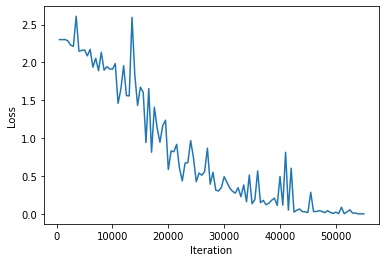

In [ ]:
plt.ylabel("Loss")
plt.xlabel("Iteration")
plt.plot(iteration, loss)

#Function for plotting table

In [ ]:
def table(l1, l2, l3, columns):
  plt.rcParams["figure.figsize"] = [10, 5]
  plt.rcParams["figure.autolayout"] = True
  
  fig, axs = plt.subplots(1, 1)
  data = np.column_stack((l1, l2, l3))
  axs.axis('tight')
  axs.axis('off')
  the_table = axs.table(cellText=data, colLabels=columns, loc='center', cellLoc = 'center')
  the_table.auto_set_font_size(False)
  the_table.set_fontsize(18)
  the_table.scale(1.5, 1.5)
  plt.show()

#table data

In [ ]:
l1= ['Hidden Layer', 'Nodes in Hidden Layer', 'Iteration', 'Learning Rate', 'Bath size', 
           'Optimizer', 'Loss Function', 'Activation Function', 'Loss', 'Accuracy (%)']
l2 = [6,200,20000,.01,20,'SGD','Cross Entropy', 'ReLU', 2.1379,22.2786]
l3 = [6,500,55000,.05,64,'SGD','Cross Entropy', 'ReLU', 0.0024,91.2712]
columns = ['','Experiment 1', 'Experiment 2']

#The comparison between two experiments

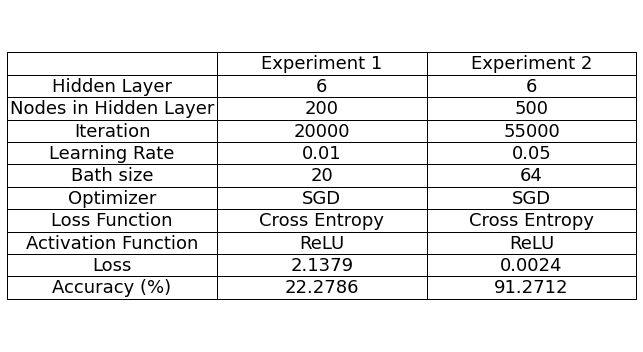

In [ ]:
table(l1, l2,l3,columns)

#Function for plotting table

In [2]:
def table2(l1, l2,l3,l4, columns):
  plt.rcParams["figure.figsize"] = [15, 2]
  plt.rcParams["figure.autolayout"] = True
  
  fig, axs = plt.subplots(1, 1)
  data = np.row_stack((l1, l2,l3,l4))
  axs.axis('tight')
  axs.axis('off')
  the_table = axs.table(cellText=data, colLabels=columns, loc='center', cellLoc = 'center')
  the_table.auto_set_font_size(False)
  the_table.set_fontsize(18)
  the_table.scale(1.5, 1.5)
  plt.show()

#Table data

In [3]:
l1 = ['1', 1, 2.1379, 22.27]
l2 = ['1', 2, 0.0024, 91.27]
l3 = ['2', 1, 0.4234, 86.78]
l4 = ['2', 2, 0.0946, 89.94]

columns = [ 'Dataset', 'Experiment', 'Loss', 'Accuracy (%)']

#Comparison of the results between the first dataset and second dataset

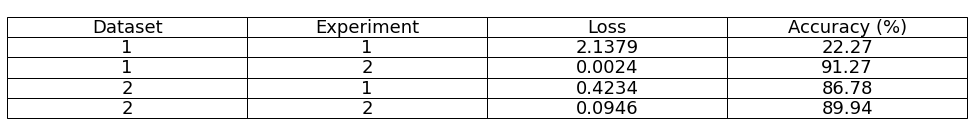

In [4]:
table2(l1,l2,l3,l4,columns)